# EDA

- Word cloud of each senator
- Number of bills per senator
- Number of bills throughout time (per senator, per topic)

In [29]:
import pandas as pd
import json
import bs4
import re
from tqdm.notebook import tqdm
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
dataset = pd.read_csv('bills.csv')
print(dataset.shape)
dataset.head(20)


(14794, 13)


Unnamed: 0  congress    type  bill_num  \
0            0        13  Senate         1   
1            1        13  Senate         2   
2            2        13  Senate         3   
3            3        13  Senate         4   
4            4        13  Senate         5   
5            5        13  Senate         6   
6            6        13  Senate         7   
7            7        13  Senate         8   
8            8        13  Senate         9   
9            9        13  Senate        10   
10          10        13  Senate        11   
11          11        13  Senate        12   
12          12        13  Senate        13   
13          13        13  Senate        14   
14          14        13  Senate        15   
15          15        13  Senate        16   
16          16        13  Senate        17   
17          17        13  Senate        18   
18          18        13  Senate        19   
19          19        13  Senate        20   

                                                title       filed_on  \
0      SPECIAL MEASURES TO LOWER THE COST OF MEDICINE  June 30, 2004   
1                   THE CONSTITUTIONAL CONVENTION ACT  June 30, 2004   
2     MAGNA CARTA OF PATIENT'S RIGHTS AND OBLIGATIONS  June 30, 2004   
3                        HEALTH PROMOTION ACT OF 2004  June 30, 2004   
4   INCREASING THE ALLOWABLE PERSONAL ADDITIONAL T...  June 30, 2004   
5                               NATIONAL RAILWAYS ACT  June 30, 2004   
6            NATIONAL LAND USE ACT OF THE PHILIPPINES  June 30, 2004   
7         DOWNSTREAM NATURAL GAS INDUSTRY ACT OF 2004  June 30, 2004   
8        NATIONAL NON-CONVENTIONAL ENERGY PROGRAM ACT  June 30, 2004   
9   SECURITY OF TENURE FOR AGRARIAN REFORM BENEFIC...  June 30, 2004   
10         REVISED PUBLIC LAND ACT OF THE PHILIPPINES  June 30, 2004   
11  PROHIBITING THE ESTABLISHMENT OF POLITICAL DYN...  June 30, 2004   
12  ALLOWING MARRIED WOMEN TO USE THEIR MAIDEN NAM...  June 30, 2004   
13                                  HALAL ACT OF 2004  June 30, 2004   
14  DISCOUNT POWER RATE CONSUMPTION/GEOTHERMAL POW...  June 30, 2004   
15               DEREGULATING CERTAIN PUBLIC SERVICES  June 30, 2004   
16   PHILIPPINE NATIONAL POLICE MODERNIZATION PROGRAM  June 30, 2004   
17      OVERSEAS FILIPINO WORKERS ADDITIONAL BENEFITS  June 30, 2004   
18  PHILIPPINE ENVIRONMENTAL PROTECTION AUTHORITY ...  June 30, 2004   
19                      REVISED AGRI-AGRA ACT OF 2004  June 30, 2004   

                                filed_by     introduced_by  \
0   Flavier, Juan M., Angara, Edgardo J.  Senator FLAVIER;   
1                       Flavier, Juan M.  Senator FLAVIER;   
2   Flavier, Juan M., Angara, Edgardo J.  Senator FLAVIER;   
3   Flavier, Juan M., Angara, Edgardo J.  Senator FLAVIER;   
4                       Flavier, Juan M.  Senator FLAVIER;   
5   Flavier, Juan M., Angara, Edgardo J.  Senator FLAVIER;   
6   Flavier, Juan M., Angara, Edgardo J.  Senator FLAVIER;   
7                       Flavier, Juan M.  Senator FLAVIER;   
8   Flavier, Juan M., Angara, Edgardo J.  Senator FLAVIER;   
9                       Flavier, Juan M.  Senator FLAVIER;   
10                      Flavier, Juan M.  Senator FLAVIER;   
11                      Flavier, Juan M.  Senator FLAVIER;   
12  Flavier, Juan M., Angara, Edgardo J.  Senator FLAVIER;   
13  Flavier, Juan M., Angara, Edgardo J.  Senator FLAVIER;   
14  Flavier, Juan M., Angara, Edgardo J.  Senator FLAVIER;   
15                      Flavier, Juan M.  Senator FLAVIER;   
16  Flavier, Juan M., Angara, Edgardo J.  Senator FLAVIER;   
17  Flavier, Juan M., Angara, Edgardo J.  Senator FLAVIER;   
18  Flavier, Juan M., Angara, Edgardo J.  Senator FLAVIER;   
19                      Flavier, Juan M.  Senator FLAVIER;   

                                           long_title     scope  \
0   AN ACT PRESCRIBING SPECIAL  MEASURES  TO LOWER...  National   
1   AN ACT CALLING FOR A  CONSTITUTIONAL CONVENTIO...  National   
2   AN ACT DECLARING

In [11]:
# check the null values
dataset.isnull().mean()

Unnamed: 0             0.000000
congress               0.000000
type                   0.000000
bill_num               0.000000
title                  0.000000
filed_on               0.000000
filed_by               0.000000
introduced_by          0.000000
long_title             0.000000
scope                  0.000000
subjects               0.000000
primary_committee      0.002433
secondary_committee    0.290118
dtype: float64

Secondary_committee has 30% missing data. This might be okay since it is just a 2nd committee and might not be needed in Passing of the Legislation.

In [12]:
# Identify the type of ditribution and 
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14794 entries, 0 to 14793
Data columns (total 13 columns):
Unnamed: 0             14794 non-null int64
congress               14794 non-null int64
type                   14794 non-null object
bill_num               14794 non-null int64
title                  14794 non-null object
filed_on               14794 non-null object
filed_by               14794 non-null object
introduced_by          14794 non-null object
long_title             14794 non-null object
scope                  14794 non-null object
subjects               14794 non-null object
primary_committee      14758 non-null object
secondary_committee    10502 non-null object
dtypes: int64(3), object(10)
memory usage: 1.5+ MB


Unnamed: 0      congress      bill_num
count  14794.000000  14794.000000  1.479400e+04
mean    7827.741652     15.291943  3.069728e+03
std     4527.806172      1.603545  1.818668e+05
min        0.000000     13.000000  1.000000e+00
25%     3813.250000     14.000000  6.200000e+02
50%     7873.500000     15.000000  1.244000e+03
75%    11733.750000     17.000000  1.936000e+03
max    15640.000000     18.000000  2.209201e+07

In [13]:
dataset['lower_name'] = dataset.introduced_by.str.lower().str[:14]

df_low = dataset['lower_name']
#df_ll = df_low.groupby()
#df =df_low.groupby('lower_name').count()
#df_low = df_low.drop_duplicates()
df_low.head(2)

0    senator flavie
1    senator flavie
Name: lower_name, dtype: object

## Creating a Word Cloud

In [40]:
# list of unique senator name convention .. Manually do in excel
df_sen = pd.read_csv('sen_code_uni.csv')
print(df_sen.shape)
list_sen = df_sen['Code'].tolist()
len(list_sen)

(51, 6)


51

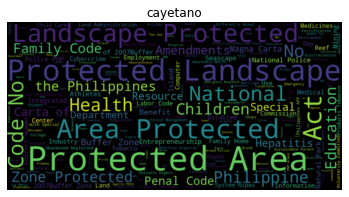

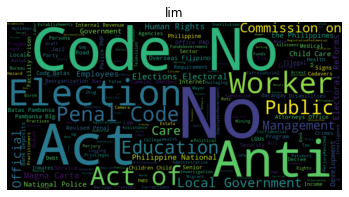

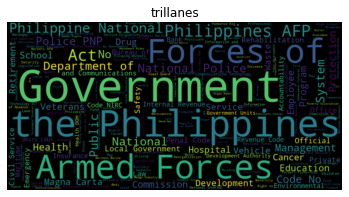

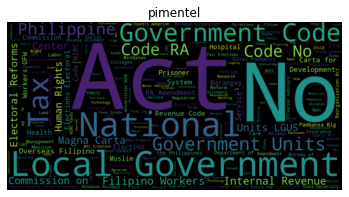

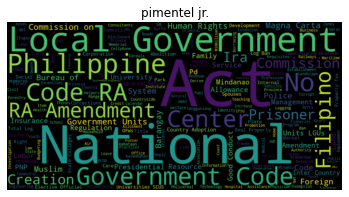

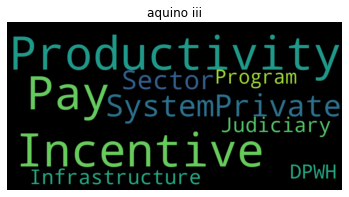

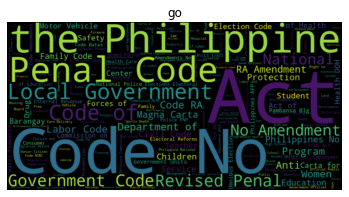

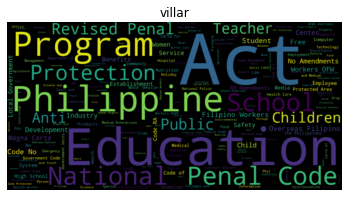

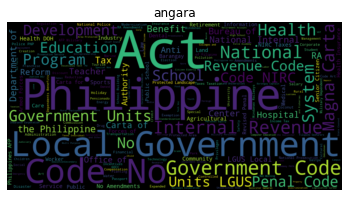

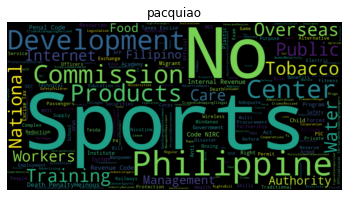

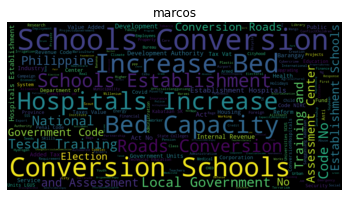

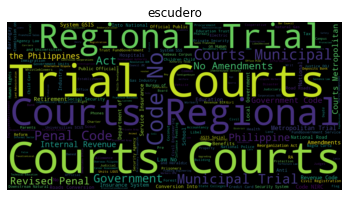

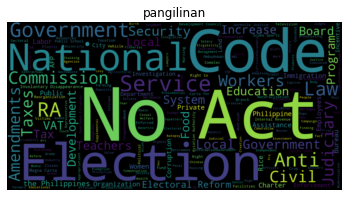

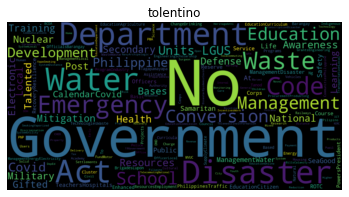

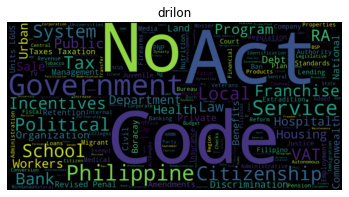

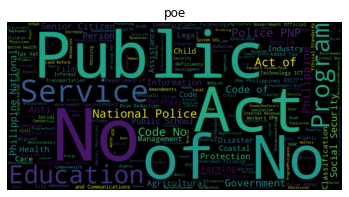

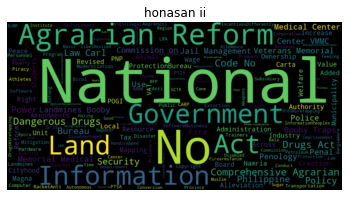

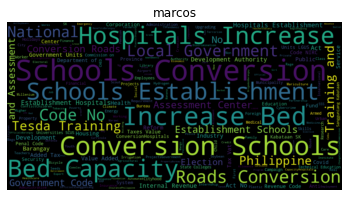

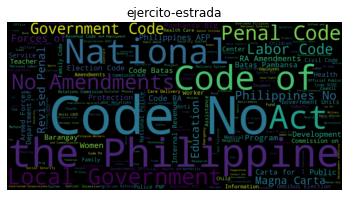

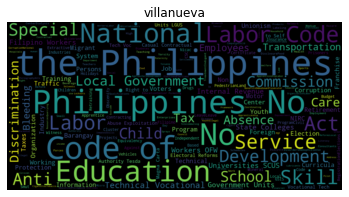

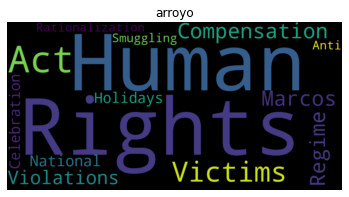

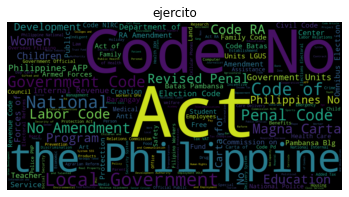

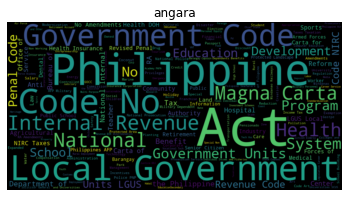

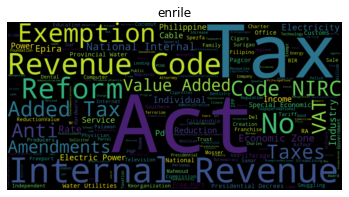

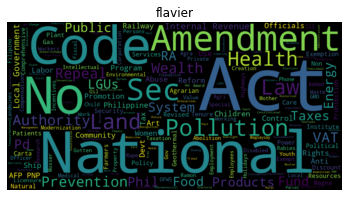

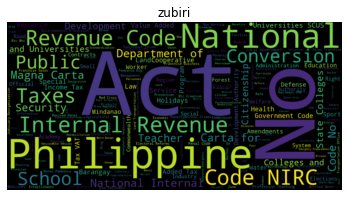

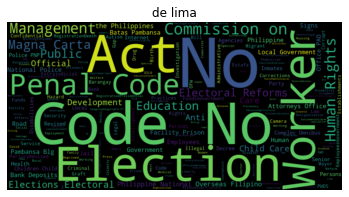

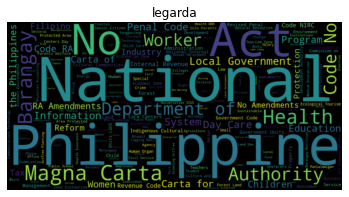

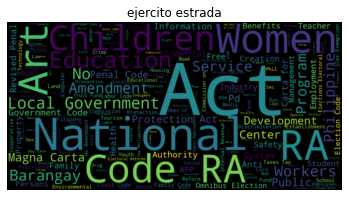

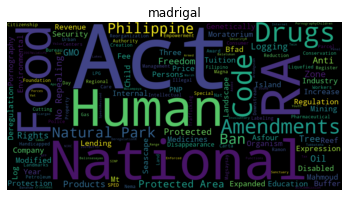

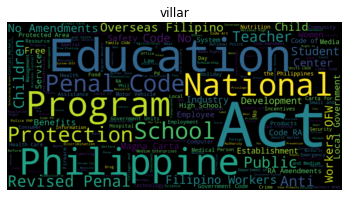

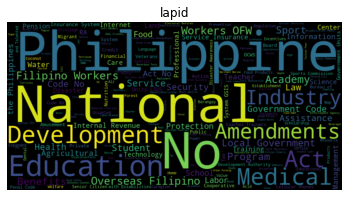

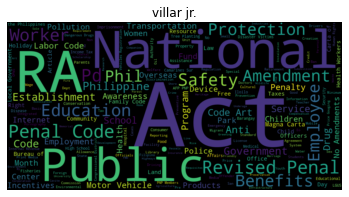

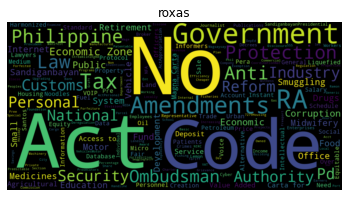

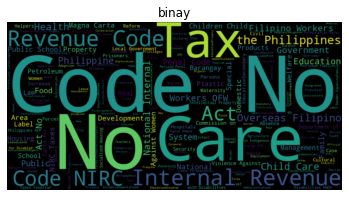

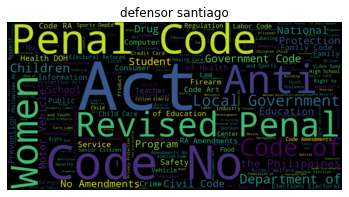

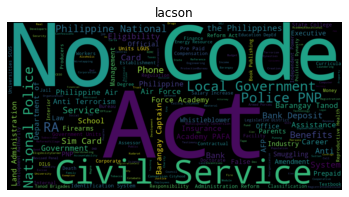

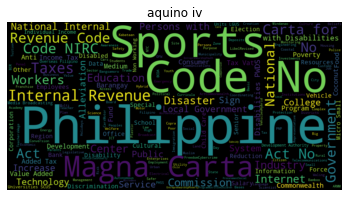

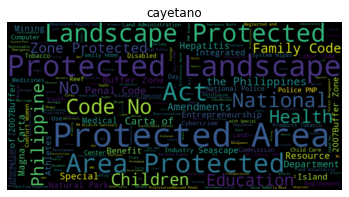

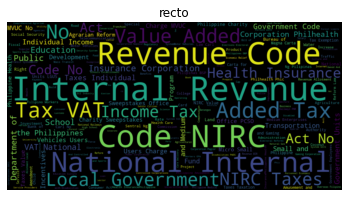

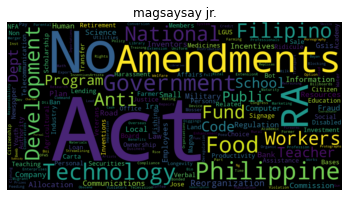

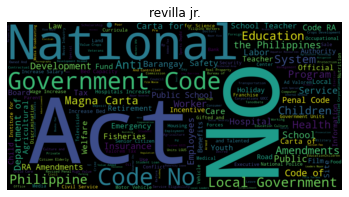

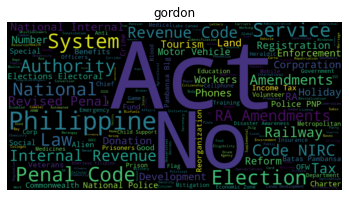

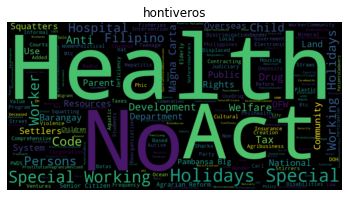

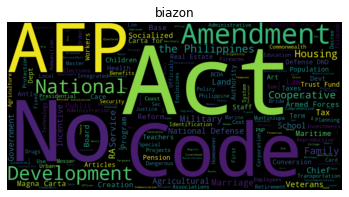

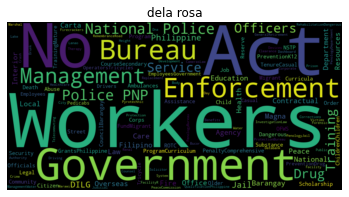

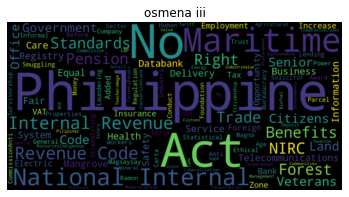

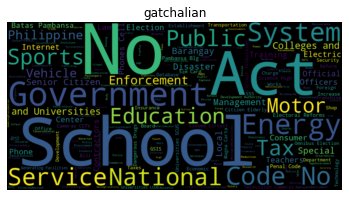

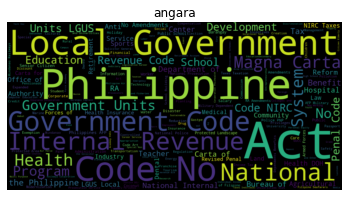

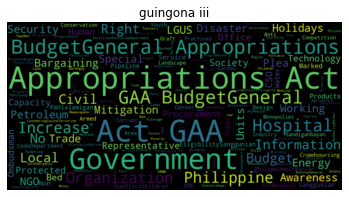

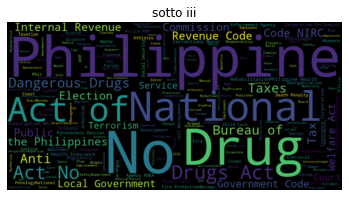

In [44]:
#wc = WordCloud().generate(' '.join(dataset['introduced_by']))

for ss in list_sen:
    wc = WordCloud(width=1200, height=600).generate(' '.join(dataset[dataset['introduced_by'].str.lower().str.contains(ss)]['subjects']))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(ss)
    plt.show()

## Bar Plot per Senator

In [57]:
# combining sen_code_uni.csv and bills (just use the introduce by)
df_sen = pd.read_csv('combine.csv') 
len(df_sen)
df_sen.head(2)



Code_10          filed_by Last_name first_name        unique     Code  \
0  flavier, j  Flavier, Juan M.   Flavier       Juan  Flavier_Juan  flavier   
1  flavier, j  Flavier, Juan M.   Flavier       Juan  Flavier_Juan  flavier   

     type  bill_num                                           title  \
0  Senate         1  SPECIAL MEASURES TO LOWER THE COST OF MEDICINE   
1  Senate         2               THE CONSTITUTIONAL CONVENTION ACT   

     filed_on                            filed_by.1     introduced_by  \
0  2004-06-30  Flavier, Juan M., Angara, Edgardo J.  Senator FLAVIER;   
1  2004-06-30                      Flavier, Juan M.  Senator FLAVIER;   

                                          long_title     scope  \
0  AN ACT PRESCRIBING SPECIAL  MEASURES  TO LOWER...  National   
1  AN ACT CALLING FOR A  CONSTITUTIONAL CONVENTIO...  National   

                                            subjects  \
0  Medicines (Lowering the Cost)           Drugs/...   
1  Constitutional Convention               Charte...   

                                   primary_committee secondary_committee  \
0                              Health and Demography  Trade and Commerce   
1  Constitutional Amendments, Revision of Codes a...             Finance   

   congress  Year  
0        13  2004  
1        13  2004

<AxesSubplot:xlabel='count', ylabel='unique'>

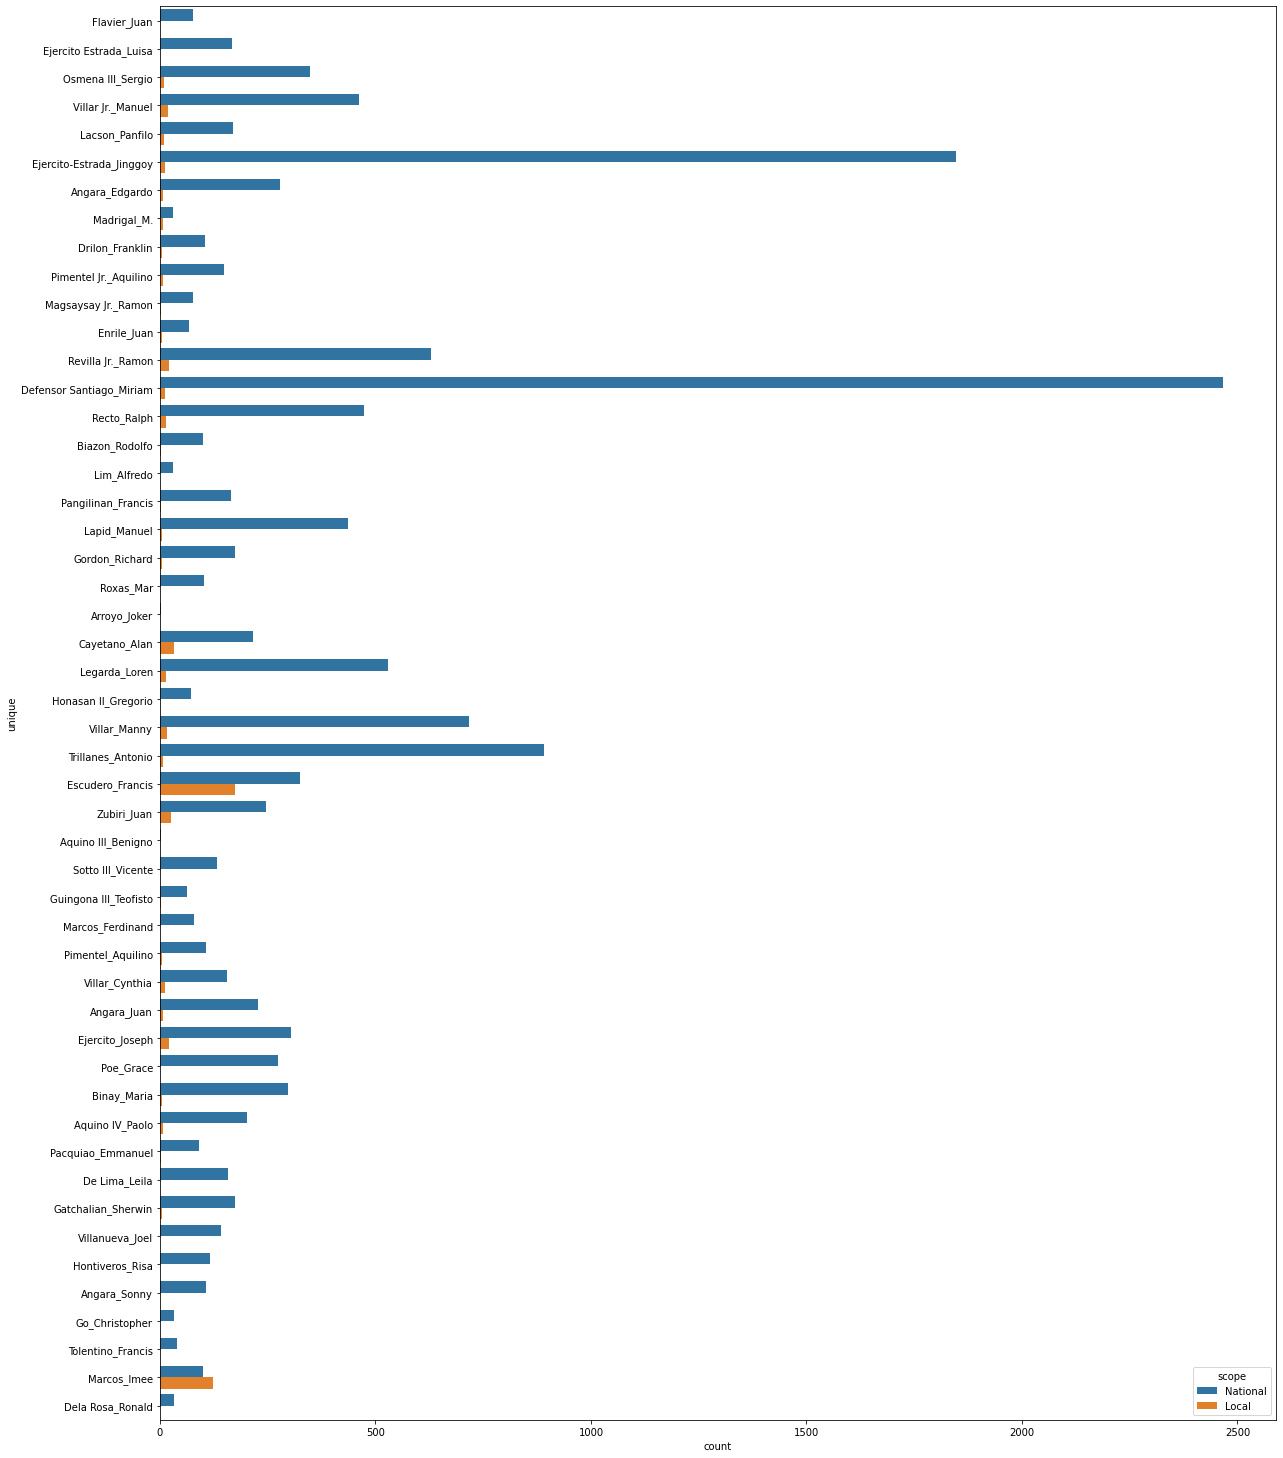

In [58]:
plt.figure(figsize=(20, 26))
sns.countplot(y='unique', hue="scope", data=df_sen)


<AxesSubplot:xlabel='count', ylabel='primary_committee'>

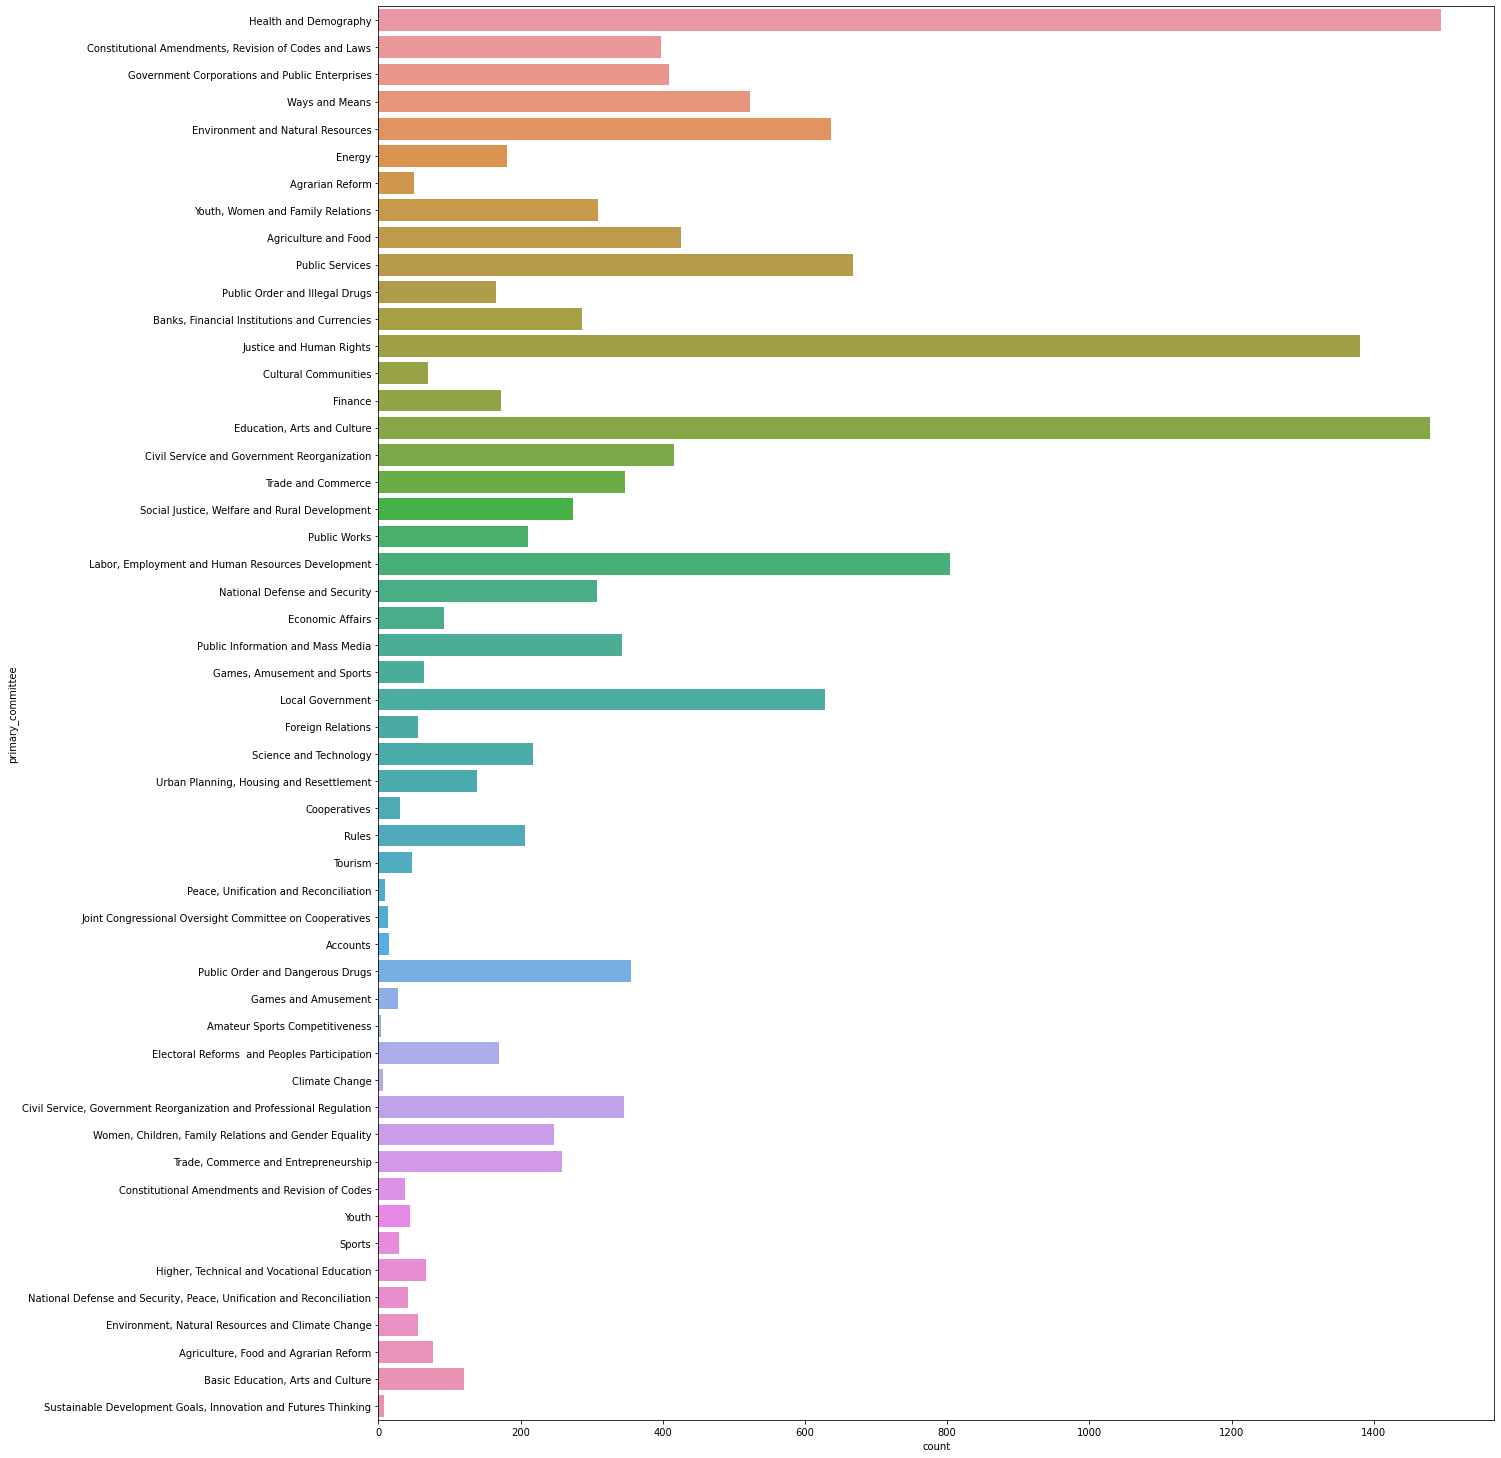

In [59]:
plt.figure(figsize=(20, 26))
sns.countplot(y='primary_committee', data=df_sen)


In [76]:
plt.figure(figsize=(20, 26))
#sen = df_sen.pivot_table(values='congress',index='unique',columns='Year')
#sns.heatmap(sen)
gg = df_sen[['unique', 'Year', 'Code']]
g = gg.groupby(['unique', 'Year'])
g.count()


#sns.countplot(y='unique', hue="Year", data=df_sen)

Code
unique         Year      
Angara_Edgardo 2004    48
               2005    32
               2006    11
               2007    87
               2008     9
...                   ...
Zubiri_Juan    2016    23
               2017    28
               2018    22
               2019    66
               2020    17

[352 rows x 1 columns]

<Figure size 1440x1872 with 0 Axes>